In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import keras
import matplotlib.pyplot as plt
import os
import pathlib
import cv2
import numpy as np


In [3]:
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout

In [5]:
CATEGORIES = ["01_palm", '02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']
IMG_SIZE = 50
data_path=r"C:\Users\ASUS\OneDrive\Desktop\Hand_gesture\archive\leapGestRecog"

In [6]:
image_data = []
for dr in os.listdir(data_path):
    for category in CATEGORIES:
        class_index = CATEGORIES.index(category)
        path = os.path.join(data_path, dr, category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)), class_index])
            except Exception as e:
                pass
image_data[0]

[array([[5, 4, 4, ..., 3, 4, 2],
        [5, 4, 5, ..., 3, 3, 3],
        [4, 5, 4, ..., 4, 5, 3],
        ...,
        [4, 5, 5, ..., 5, 5, 5],
        [5, 5, 6, ..., 5, 7, 4],
        [4, 7, 5, ..., 5, 4, 4]], dtype=uint8),
 0]

In [7]:
# shuffle the input data
import random
random.shuffle(image_data)

In [8]:
input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)

In [9]:
label[:10]

[8, 8, 6, 4, 2, 8, 7, 6, 3, 8]

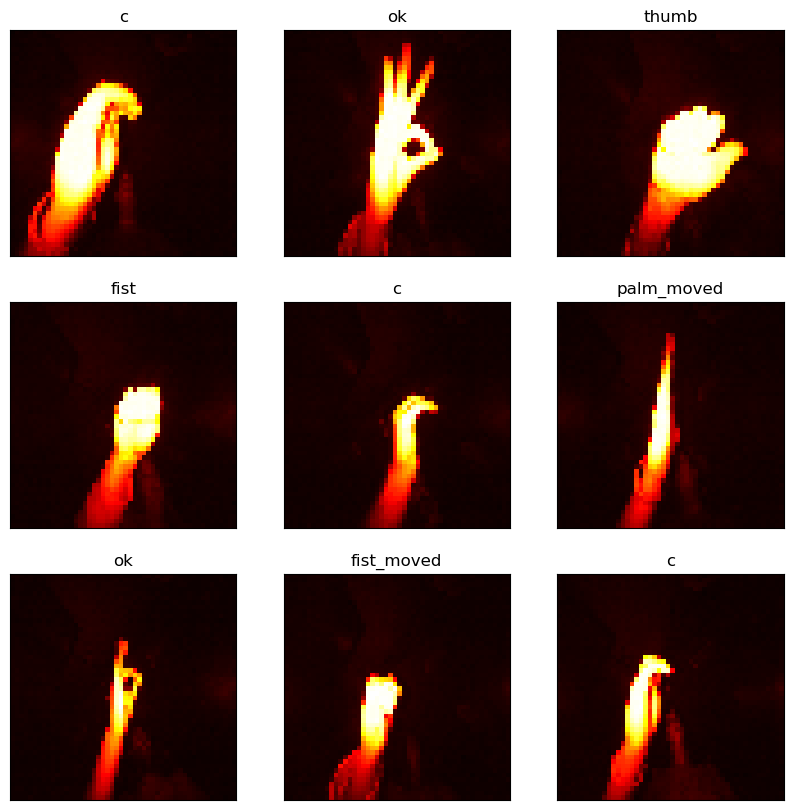

In [10]:
plt.figure(1, figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(image_data[i][0], cmap='hot')
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[label[i]][3:])
plt.show()

In [11]:
# Normalizing the data
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data/255.0
input_data.shape

(20000, 50, 50)

In [12]:
label = keras.utils.to_categorical(label, num_classes=10,dtype='i1')
label[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int8)

In [13]:
# reshaping the data
input_data.shape = (-1, IMG_SIZE, IMG_SIZE, 1)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.3, random_state=0)

In [15]:
model = keras.models.Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (IMG_SIZE, IMG_SIZE, 1)))
model.add(Activation('relu'))


model.add(Conv2D(filters = 32, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

In [16]:
model.fit(X_train, y_train, epochs = 7, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/7


438/438 [==============================] - 12s 26ms/step - loss: 0.3876 - accuracy: 0.8718 - val_loss: 0.0155 - val_accuracy: 0.9950
Epoch 2/7
438/438 [==============================] - 11s 25ms/step - loss: 0.0211 - accuracy: 0.9941 - val_loss: 0.0019 - val_accuracy: 0.9997
Epoch 3/7
438/438 [==============================] - 11s 25ms/step - loss: 0.0093 - accuracy: 0.9971 - val_loss: 9.7555e-04 - val_accuracy: 0.9997
Epoch 4/7
438/438 [==============================] - 11s 24ms/step - loss: 0.0047 - accuracy: 0.9983 - val_loss: 0.0114 - val_accuracy: 0.9977
Epoch 5/7
438/438 [==============================] - 11s 24ms/step - loss: 0.0035 - accuracy: 0.9987 - val_loss: 0.0016 - val_accuracy: 0.9993
Epoch 6/7
438/438 [==============================] - 11s 24ms/step - loss: 0.0021 - accuracy: 0.9993 - val_loss: 0.0094 - val_accuracy: 0.9977
Epoch 7/7
438/438 [==============================] - 11s 24ms/step - loss: 0.0032 - accuracy: 0.9989 - val_loss: 0.0016 - val_accuracy: 

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 46, 46, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 23, 23, 32)        0         
                                                        

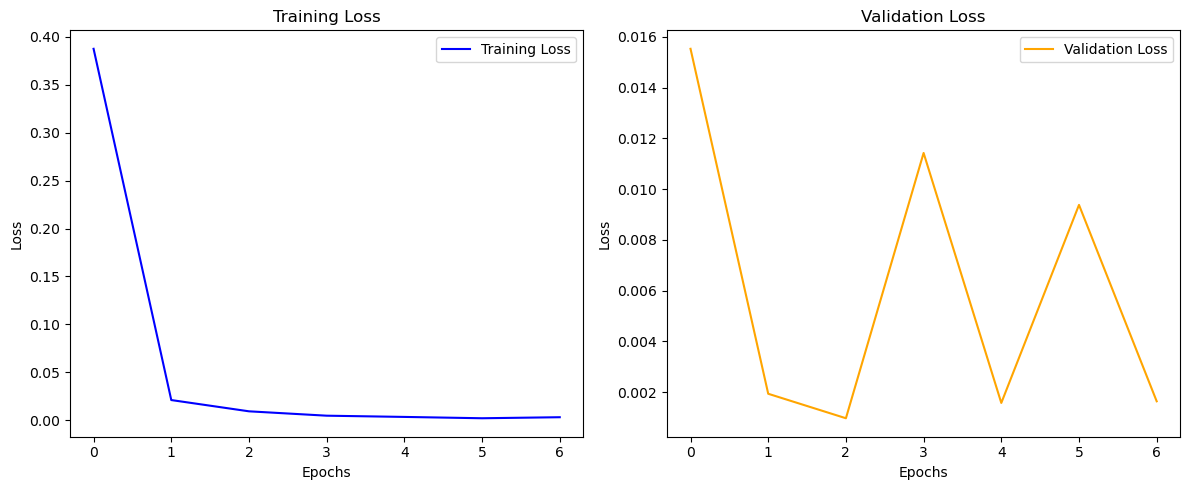

In [18]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(model.history.history['loss'], label='Training Loss', color='blue')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting Validation Loss
plt.subplot(1, 2, 2)
plt.plot(model.history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

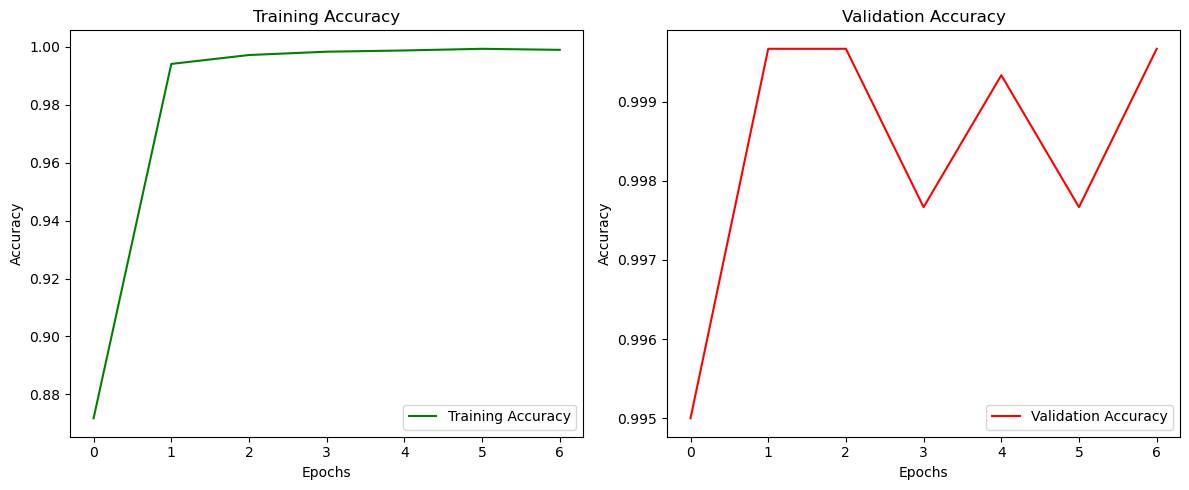

In [19]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(model.history.history['accuracy'], label='Training Accuracy', color='green')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

188/188 [==============================] - 1s 6ms/step - loss: 0.0016 - accuracy: 0.9997
Test accuracy: 99.97%


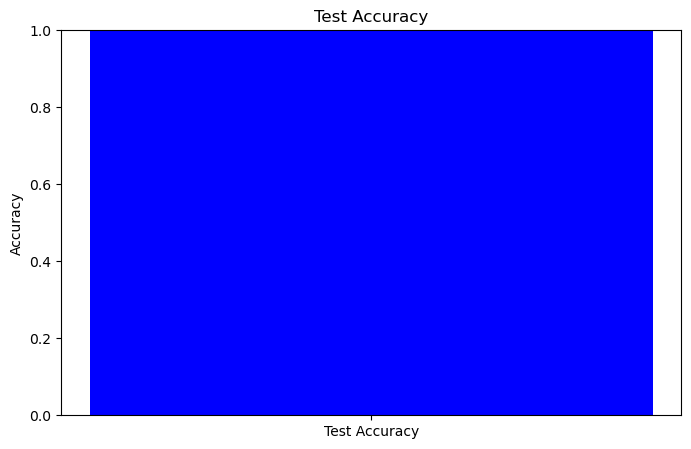

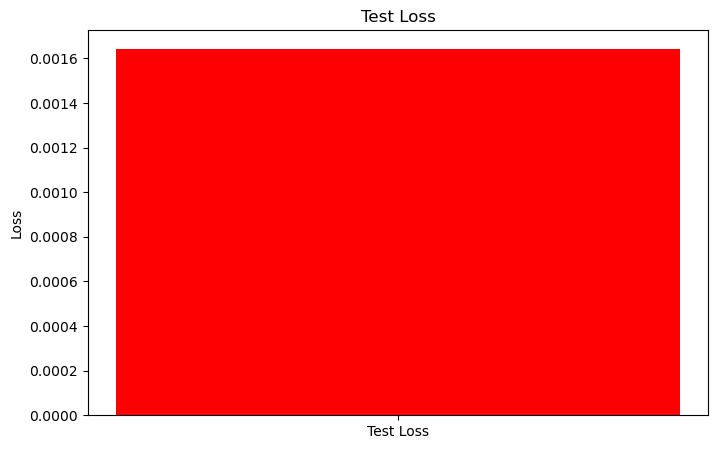

In [20]:

test_loss, test_accuracy = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

# Visualize Test Accuracy
plt.figure(figsize=(8, 5))
plt.bar(['Test Accuracy'], [test_accuracy], color=['blue'])
plt.ylim(0, 1)  # Assuming accuracy is between 0 and 1
plt.title('Test Accuracy')
plt.ylabel('Accuracy')
plt.show()

# Visualize Test Loss
plt.figure(figsize=(8, 5))
plt.bar(['Test Loss'], [test_loss], color=['red'])
plt.title('Test Loss')
plt.ylabel('Loss')
plt.show()

188/188 [==============================] - 1s 6ms/step


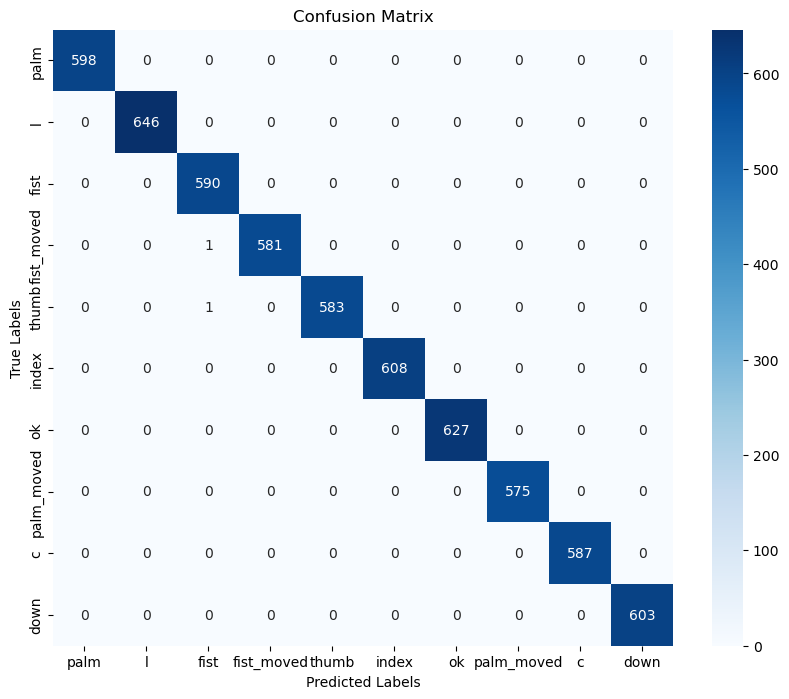

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

cat = [c[3:] for c in CATEGORIES]

# Calculate the confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test), axis=1))

plt.figure(figsize=(10, 8))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cat, yticklabels=cat)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()